# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class, combine_info_utils
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class, cluster_analysis
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info
from null_behaviors import show_null_trajectory, find_best_arc, curvature_utils, curv_of_traj_utils
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils, hyperparam_tuning_class
from reinforcement_learning.env_related import env_for_rnn, env_utils, base_env, collect_agent_data, process_agent_data
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, rl_base_utils, sb3_utils
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics, monkey_heading_utils
from visualization.animation import animation_func, animation_utils, animation_class
from planning_analysis.test_params_for_planning import params_test_combos_class, params_utils
from visualization.plotly_tools import plotly_for_monkey, plotly_for_time_series, plotly_preparation, plotly_for_correlation, plotly_plot_class
from visualization.dash_tools import dash_prep_class, dash_utils, dash_utils, dash_comparison_class, dash_params_class
from visualization.dash_tools.dash_main_class_methods import dash_main_class
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils
from planning_analysis.plan_factors import plan_factors_utils, build_factor_comp, plan_factors_class, monkey_plan_factors_x_sess_class
from planning_analysis.show_planning import nxt_ff_utils, show_planning_class, show_planning_utils
from planning_analysis.show_planning.cur_vs_nxt_ff import cvn_helper_class, find_cvn_utils, plot_cvn_class, plot_cvn_utils, plot_monkey_heading_helper_class, cvn_from_ref_class
from planning_analysis.show_planning import illustrate_concepts
from visualization.plotly_tools import plotly_for_null_arcs
from visualization.plotly_tools import plotly_for_time_series, plotly_for_null_arcs, plotly_for_correlation, plotly_for_monkey, plotly_plot_class
from planning_analysis.plan_indicators import diff_in_curv_utils


from importlib import reload
from eye_position_analysis import eye_positions
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from os.path import exists
import seaborn as sns
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import itertools
import plotly.express as px
import gc
from scipy.stats import rankdata
from scipy import stats
from IPython.display import HTML
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, fbeta_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from math import pi
from scipy.ndimage import gaussian_filter1d
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import os, sys, sys
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
pd.options.display.max_rows = 101

Set up logging configuration.


# Use CurVsNxtFfFromRefClass class

In [2]:
reload(plot_cvn_class)

<module 'planning_analysis.show_planning.cur_vs_nxt_ff.plot_cvn_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/planning_analysis/show_planning/cur_vs_nxt_ff/plot_cvn_class.py'>

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Bruno/data_0328/ff_dataframe.h5
Removed 0 rows out of 728 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 728 rows
Retrieving shared_stops_near_ff_df succeeded
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=False`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 4.534% of ff_x_relative > ff_y_relative. Will be modified instead.
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=False`, some rows may still be removed (e.g., negative ff_y_relative).

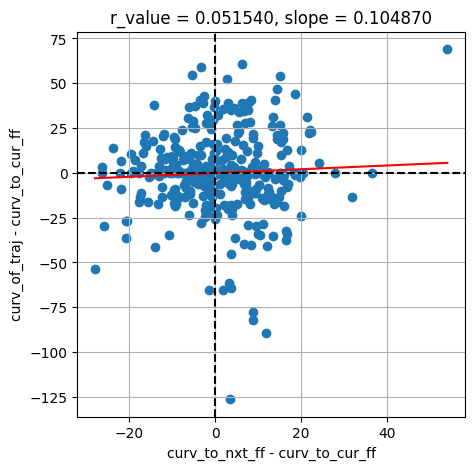

In [29]:
normalize = False
eliminate_outliers = False
use_curv_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 0]
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

#data_item_info = find_cvn_utils.extract_key_info_from_data_item_for_stops_near_ff_class(data_item)

snf = cvn_from_ref_class.CurVsNxtFfFromRefClass(raw_data_folder_path=raw_data_folder_path)
snf.get_more_monkey_data()
snf.traj_curv_descr = 'Traj Curv: From Current Point to Right Before Stop'



snf.streamline_organizing_info(ref_point_mode='distance', ref_point_value=-150, 
                              #ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curv_to_ff_center=use_curv_to_ff_center,  eliminate_outliers=eliminate_outliers,
                               stops_near_ff_df_exists_ok=True)

snf.ax_for_corr = snf.find_relationships_from_info(normalize=normalize, show_plot=True)
snf.prepare_to_plot_stops_near_ff()

In [36]:
reload(curvature_utils)

<module 'null_behaviors.curvature_utils' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/null_behaviors/curvature_utils.py'>

In [37]:
snf.add_info_to_nxt_ff_and_cur_ff_df()

[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=False`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 4.534% of ff_x_relative > ff_y_relative. Will be modified instead.
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=False`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Warning] 0.252% of ff_x_relative > ff_y_relative. Will be modified instead.


In [ ]:
snf.nxt_curv_df.loc[41]

In [ ]:
snf.add_info_to_nxt_ff_and_cur_ff_df(deal_with_rows_with_big_ff_angles=False)

In [40]:
snf.nxt_ff_df_modified[snf.nxt_ff_df_modified['stop_point_index']>=ref_point_index]

,ff_index,point_index,ff_x,ff_y,monkey_x,monkey_y,monkey_angle,ff_distance,ff_angle,ff_angle_boundary,stop_point_index,valid_null_arc
41,115,17749,-17.26957,272.41441,-181.30615,205.87381,-0.40004,177.01879,0.78540,0.72888,17808,0
42,117,17955,51.62284,751.98559,66.06808,492.90909,1.17320,259.47890,0.45330,0.41475,18092,1
43,118,18075,29.39456,774.20468,98.78424,620.77850,1.51559,168.38800,0.47995,0.42052,18187,1
44,129,19584,-156.45722,607.57468,44.43483,805.89166,-2.77719,282.28928,0.41455,0.37912,19711,1
45,130,19702,-181.70970,625.50643,-48.10194,707.18292,-1.95714,156.59529,-0.63576,-0.57185,19794,1
...,...,...,...,...,...,...,...,...,...,...,...,...
392,1191,214016,397.00409,-113.90913,612.13464,-277.89151,2.65805,270.50208,-0.16775,-0.13078,214069,1
393,1197,215572,-465.20478,188.76644,-271.19601,563.88281,-2.30189,422.31705,0.25378,0.23010,215668,1
394,1199,216012,-181.51432,-311.16204,-370.23627,-61.83930,-0.92786,312.69442,0.00499,0.00000,216067,1
395,1206,217098,-372.65704,730.38381,-752.50525,508.24985,-0.07899,440.03199,0.60815,0.58543,217211,1


In [31]:
snf.nxt_ff_df_from_ref[snf.nxt_ff_df_from_ref['stop_point_index']>=ref_point_index]

,ff_index,point_index,ff_x,ff_y,monkey_x,monkey_y,monkey_angle,ff_distance,ff_angle,ff_angle_boundary,stop_point_index
41,115,17749,32.98693,391.27061,-181.30615,205.87381,-0.40004,283.36107,1.11326,1.07796,17808
42,117,17955,51.62284,751.98559,66.06808,492.90909,1.17320,259.47890,0.45330,0.41475,18092
43,118,18075,29.39456,774.20468,98.78424,620.77850,1.51559,168.38800,0.47995,0.42052,18187
44,129,19584,-156.45722,607.57468,44.43483,805.89166,-2.77719,282.28928,0.41455,0.37912,19711
45,130,19702,-181.70970,625.50643,-48.10194,707.18292,-1.95714,156.59529,-0.63576,-0.57185,19794
...,...,...,...,...,...,...,...,...,...,...,...
392,1191,214016,397.00409,-113.90913,612.13464,-277.89151,2.65805,270.50208,-0.16775,-0.13078,214069
393,1197,215572,-465.20478,188.76644,-271.19601,563.88281,-2.30189,422.31705,0.25378,0.23010,215668
394,1199,216012,-181.51432,-311.16204,-370.23627,-61.83930,-0.92786,312.69442,0.00499,0.00000,216067
395,1206,217098,-372.65704,730.38381,-752.50525,508.24985,-0.07899,440.03199,0.60815,0.58543,217211


# Plot some trials

In [4]:
current_i = 5

In [5]:
current_i = snf.make_individual_plots_for_stops_near_ff_in_plotly(current_i, max_num_plot_to_make=1, 
                                             show_eye_positions_for_both_eyes=True)

diff_in_abs: 0.48530447725023484
duration_to_plot: [59.527024, 67.05219]


# Variables of interest

## diff_in_abs_angle_to_nxt_ff

In [6]:
reload(plotly_plot_class)
reload(plot_cvn_class)
reload(cvn_from_ref_class)
reload(cvn_helper_class)

<module 'planning_analysis.show_planning.cur_vs_nxt_ff.cvn_helper_class' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/planning_analysis/show_planning/cur_vs_nxt_ff/cvn_helper_class.py'>

In [7]:
reload(plotly_for_monkey)

<module 'visualization.plotly_tools.plotly_for_monkey' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/visualization/plotly_tools/plotly_for_monkey.py'>

In [8]:

fixed_current_i = 14

kwargs = {"show_visible_segments": False,
          "show_reward_boundary": True,
        "show_current_eye_positions": False,
        "show_alive_fireflies": False,
        "show_visible_fireflies": False,
        'show_cur_ff': True,
        'show_nxt_ff': True,
        'show_traj_color_as_speed': False,
        'show_cur_and_nxt_stops': False,
        'show_capture_stops': False,
        "show_stops": True,
        'show_stop_point_indices': [snf.stops_near_ff_df_counted.iloc[fixed_current_i]['stop_point_index']],
        'show_monkey_heading': False,
        'plot_arena_edge': False,
        'show_null_arcs_to_ff': False,
        'show_null_arc_to_cur_ff': True,
}

_ = snf.make_individual_plots_for_stops_near_ff_in_plotly(fixed_current_i, max_num_plot_to_make=1, **kwargs, 
                                                          show_fig=True)

diff_in_abs: 0.2847302216269688
duration_to_plot: [92.99202, 99.537932]


In [9]:
snf.monkey_plot_params['show_cur_and_nxt_stops_indices']

### show angle from monkey stop to next ff

In [10]:
reload(illustrate_concepts)

<module 'planning_analysis.show_planning.illustrate_concepts' from '/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/planning_analysis/show_planning/illustrate_concepts.py'>

In [11]:
#fixed_current_i = 14

fixed_current_i = 14

kwargs['show_null_arcs_to_ff'] = True

# Make individual plots for stops near ff in Plotly
current_i = snf.make_individual_plots_for_stops_near_ff_in_plotly(
    fixed_current_i, max_num_plot_to_make=1, show_fig=False, **kwargs
)

line_stop_nxt_ff, line_of_stop_heading, arc_xy = illustrate_concepts.prepare_to_show_angle_from_monkey_stop_to_next_ff(
    snf, fixed_current_i) 

illustrate_concepts.plot_with_additional_elements(snf,
                                  line_of_stop_heading, line_stop_nxt_ff,
                                  arc_xy)
snf.plt.show()

diff_in_abs: 0.2847302216269688
duration_to_plot: [92.99202, 99.537932]


### show angle from null arc end to next ff
(Note: I might want to click on the null arcs to hide them)

In [12]:


kwargs['show_null_arcs_to_ff'] = False 

# Make individual plots for stops near ff in Plotly
current_i = snf.make_individual_plots_for_stops_near_ff_in_plotly(
    fixed_current_i, max_num_plot_to_make=1, show_fig=False, **kwargs
)

snf.fig = plotly_for_null_arcs.plot_null_arcs_in_plotly(snf.fig, snf.cur_null_arc_info_for_the_point, rotation_matrix=snf.current_plotly_key_comp['rotation_matrix'],
                                                            color='brown', trace_name='cur null arc', linewidth=3, opacity=0.9)

line_of_cur_null_heading, line_cur_and_nxt_ff, arc_xy = illustrate_concepts.prepare_to_show_angle_from_null_arc_end_to_next_ff(snf, fixed_current_i)

illustrate_concepts.plot_with_additional_elements(snf,
                                  line_of_cur_null_heading, line_cur_and_nxt_ff,
                                  arc_xy,
                                  arc_label='Angle from null arc end to next ff'
                                  )
snf.plt.show()

diff_in_abs: 0.2847302216269688
duration_to_plot: [92.99202, 99.537932]


# diff_in_abs_d_curv

In [13]:
# snf.make_diff_in_curv_df()
# snf.cur_end_to_next_ff_curv

In [14]:
snf.cur_ff_color = 'brown'
kwargs['show_null_arcs_to_ff'] = False 

# Make individual plots for stops near ff in Plotly
current_i = snf.make_individual_plots_for_stops_near_ff_in_plotly(
    fixed_current_i, max_num_plot_to_make=1, show_fig=False, **kwargs
)

snf.fig = illustrate_concepts.illustrate_diff_in_d_curv(snf)

# arc_from_cur_arc_end_to_next_ff, arc_from_stop_to_nxt_ff, traj_portion_before_stop = illustrate_concepts.prepare_to_illustrate_diff_in_d_curv(snf)

snf.plt.show()


diff_in_abs: 0.2847302216269688
duration_to_plot: [92.99202, 99.537932]


### iterate

In [15]:
current_i

15

In [16]:
snf.cur_ff_color = 'brown'
kwargs['show_null_arcs_to_ff'] = False 

for i in range(3, len(snf.heading_info_df)):
    print(current_i)

    # Make individual plots for stops near ff in Plotly
    current_i = snf.make_individual_plots_for_stops_near_ff_in_plotly(
        current_i, max_num_plot_to_make=1, show_fig=False, **kwargs
    )
    

    snf.fig = illustrate_concepts.illustrate_diff_in_d_curv(snf)

    # arc_from_cur_arc_end_to_next_ff, arc_from_stop_to_nxt_ff, traj_portion_before_stop = illustrate_concepts.prepare_to_illustrate_diff_in_d_curv(snf)

    snf.plt.show()

    if i == 20:
        break

15
diff_in_abs: 0.12176326465234727
duration_to_plot: [99.614898, 104.949328]


16
diff_in_abs: -0.0549925996408559
duration_to_plot: [104.56199, 112.120383]


17
diff_in_abs: 0.3197209898749962
duration_to_plot: [111.10224, 117.60224]


18
diff_in_abs: 0.07966492222511651
duration_to_plot: [116.032388, 124.835701]


19
diff_in_abs: 0.58249107192922
duration_to_plot: [149.828962, 156.19249]


20
diff_in_abs: 0.19642951571858
duration_to_plot: [162.594577, 169.094577]


21
diff_in_abs: 0.01586640973900999
duration_to_plot: [163.540714, 170.152819]


22
diff_in_abs: -0.039379661205983574
duration_to_plot: [181.269177, 188.329544]


23
diff_in_abs: -0.1739448598481701
duration_to_plot: [187.228525, 195.649983]


24
diff_in_abs: 0.45307461750777334
duration_to_plot: [190.149983, 197.309984]


25
diff_in_abs: -0.0703424336068082
duration_to_plot: [191.809984, 199.003111]


26
diff_in_abs: -0.009304408392712807
duration_to_plot: [205.786878, 213.677225]


27
diff_in_abs: 0.3355982858465021
duration_to_plot: [208.177225, 214.889027]


28
diff_in_abs: 0.3549170711683323
duration_to_plot: [209.389027, 217.080164]


29
diff_in_abs: -0.0776555938359966
duration_to_plot: [213.32342, 221.445911]


30
diff_in_abs: -0.1072842539833304
duration_to_plot: [224.245088, 229.795557]


31
diff_in_abs: 0.15170202958129259
duration_to_plot: [226.138081, 233.331291]


32
diff_in_abs: -0.1848460589821433
duration_to_plot: [231.300645, 237.979005]


## plot null arcs

In [17]:
snf.cur_ff_color = 'brown'
kwargs['show_null_arcs_to_ff'] = False 
temp_current_i = 41

# Make individual plots for stops near ff in Plotly
_ = snf.make_individual_plots_for_stops_near_ff_in_plotly(
    temp_current_i, max_num_plot_to_make=1, show_fig=False, **kwargs
)

snf.fig = illustrate_concepts.illustrate_diff_in_d_curv(snf)


snf.plt.show()


diff_in_abs: -0.23746853952025732
duration_to_plot: [288.453386, 295.397489]


In [18]:
df = diff_in_curv_utils._prepare_cur_end_to_next_ff_data(
    snf.heading_info_df, snf.nxt_ff_df_modified)
mock_monkey_info = diff_in_curv_utils._build_mock_monkey_info(
    df, use_curv_to_ff_center=False)
null_arc_curv_df = diff_in_curv_utils._make_null_arc_curv_df(mock_monkey_info, ff_radius_for_opt_arc=10)
null_arc_curv_df['ref_point_index'] = snf.heading_info_df['ref_point_index'].values
arc_from_cur_arc_end_to_next_ff = illustrate_concepts.find_arc_info_for_plotting(null_arc_curv_df, snf.stops_near_ff_row, snf.nxt_ff_df_modified, snf.monkey_information)

monkey_info = diff_in_curv_utils._prepare_prev_stop_to_next_ff_data(snf.heading_info_df['nxt_ff_index'].values, snf.heading_info_df['point_index_before_stop'].values, snf.monkey_information, snf.ff_real_position_sorted, snf.ff_caught_T_new)
monkey_curv_df = diff_in_curv_utils._make_null_arc_curv_df(monkey_info, ff_radius_for_opt_arc=10)
monkey_curv_df['ref_point_index'] = snf.heading_info_df['ref_point_index'].values
arc_from_stop_to_nxt_ff = illustrate_concepts.find_arc_info_for_plotting(monkey_curv_df, snf.stops_near_ff_row, snf.nxt_ff_df_modified, snf.monkey_information)

trajectory_df = snf.current_plotly_key_comp['trajectory_df'].copy()
window_for_curv_of_traj = [-25, 0]
trajectory_df.sort_values(by='rel_distance', inplace=True)
traj_portion_before_stop = trajectory_df[trajectory_df['rel_distance'].between(window_for_curv_of_traj[0], window_for_curv_of_traj[1])]


In [19]:
arc_from_cur_arc_end_to_next_ff

,arc_point_index,arc_ff_index,center_x,center_y,arc_starting_angle,arc_ending_angle,all_arc_radius,all_arc_end_direction,values_for_color
0,17749,115,485.34774,-131.99072,2.53174,2.46405,655.10485,-1.00000,None


In [20]:
arc_from_stop_to_nxt_ff

,arc_point_index,arc_ff_index,center_x,center_y,arc_starting_angle,arc_ending_angle,all_arc_radius,all_arc_end_direction,values_for_color
0,17806,115,-204.11929,398.18021,-0.78548,-0.02913,227.91318,1.00000,None


In [21]:
stop_point_index = snf.stops_near_ff_row['stop_point_index']
ref_point_index = snf.nxt_ff_df_modified.loc[snf.nxt_ff_df_modified['stop_point_index']==stop_point_index, 'point_index'].item()
# arc_info_for_plotting = show_null_trajectory.find_and_package_opt_arc_info_for_plotting(
#             null_arc_curv_df[null_arc_curv_df['ref_point_index']==ref_point_index], snf.monkey_information)

In [22]:
ref_point_index

17749

In [ ]:
        self.nxt_ff_df_from_ref, self.cur_ff_df_from_ref = self.find_nxt_ff_df_and_cur_ff_df_from_ref(
            ref_point_value, ref_point_mode)

In [28]:
snf.nxt_ff_df_from_ref[snf.nxt_ff_df_from_ref['stop_point_index']>=ref_point_index]

,ff_index,point_index,ff_x,ff_y,monkey_x,monkey_y,monkey_angle,ff_distance,ff_angle,ff_angle_boundary,stop_point_index
41,115,17749,32.98693,391.27061,-181.30615,205.87381,-0.40004,283.36107,1.11326,1.07796,17808
42,117,17955,51.62284,751.98559,66.06808,492.90909,1.17320,259.47890,0.45330,0.41475,18092
43,118,18075,29.39456,774.20468,98.78424,620.77850,1.51559,168.38800,0.47995,0.42052,18187
44,129,19584,-156.45722,607.57468,44.43483,805.89166,-2.77719,282.28928,0.41455,0.37912,19711
45,130,19702,-181.70970,625.50643,-48.10194,707.18292,-1.95714,156.59529,-0.63576,-0.57185,19794
...,...,...,...,...,...,...,...,...,...,...,...
392,1191,214016,397.00409,-113.90913,612.13464,-277.89151,2.65805,270.50208,-0.16775,-0.13078,214069
393,1197,215572,-465.20478,188.76644,-271.19601,563.88281,-2.30189,422.31705,0.25378,0.23010,215668
394,1199,216012,-181.51432,-311.16204,-370.23627,-61.83930,-0.92786,312.69442,0.00499,0.00000,216067
395,1206,217098,-372.65704,730.38381,-752.50525,508.24985,-0.07899,440.03199,0.60815,0.58543,217211


In [23]:
snf.nxt_ff_df_modified[snf.nxt_ff_df_modified['stop_point_index']>=ref_point_index]

,ff_index,point_index,ff_x,ff_y,monkey_x,monkey_y,monkey_angle,ff_distance,ff_angle,ff_angle_boundary,stop_point_index,valid_null_arc
41,115,17749,-17.26957,272.41441,-181.30615,205.87381,-0.40004,177.01879,0.78540,0.72888,17808,0
42,117,17955,51.62284,751.98559,66.06808,492.90909,1.17320,259.47890,0.45330,0.41475,18092,1
43,118,18075,29.39456,774.20468,98.78424,620.77850,1.51559,168.38800,0.47995,0.42052,18187,1
44,129,19584,-156.45722,607.57468,44.43483,805.89166,-2.77719,282.28928,0.41455,0.37912,19711,1
45,130,19702,-181.70970,625.50643,-48.10194,707.18292,-1.95714,156.59529,-0.63576,-0.57185,19794,1
...,...,...,...,...,...,...,...,...,...,...,...,...
392,1191,214016,397.00409,-113.90913,612.13464,-277.89151,2.65805,270.50208,-0.16775,-0.13078,214069,1
393,1197,215572,-465.20478,188.76644,-271.19601,563.88281,-2.30189,422.31705,0.25378,0.23010,215668,1
394,1199,216012,-181.51432,-311.16204,-370.23627,-61.83930,-0.92786,312.69442,0.00499,0.00000,216067,1
395,1206,217098,-372.65704,730.38381,-752.50525,508.24985,-0.07899,440.03199,0.60815,0.58543,217211,1


In [24]:
null_arc_curv_df[null_arc_curv_df['ref_point_index']>=ref_point_index]

,point_index,ff_index,monkey_x,monkey_y,monkey_angle,ff_x,ff_y,ff_distance,ff_angle,ff_angle_boundary,...,opt_arc_end_direction,opt_arc_radius,opt_arc_measure,opt_arc_length,opt_arc_end_x,opt_arc_end_y,opt_arc_d_heading,curv_diff,abs_curv_diff,ref_point_index
41,17749,115,-51.66397,243.21695,0.96095,-17.26957,272.41441,45.11614,-0.25709,-0.03358,...,-1.00000,655.10485,0.06769,44.34319,-25.05629,278.67959,-0.06769,-0.01085,0.01085,17749
42,17955,117,116.60483,632.87632,1.27540,51.62284,751.98559,135.68226,0.79483,0.72106,...,1.00000,102.48219,1.51152,154.90359,54.15172,758.81426,1.51152,0.00907,0.00907,17955
43,18075,118,57.13571,760.47152,2.20551,29.39456,774.20468,30.95434,0.47641,0.14745,...,1.00000,99.69843,0.31126,31.03181,35.17363,782.21756,0.31126,0.00539,0.00539,18075
44,19584,129,-52.08701,701.43242,-1.85625,-156.45722,607.57468,140.36529,-0.55293,-0.48162,...,-1.00000,151.12605,0.99579,150.49053,-153.94836,599.15341,-0.99579,-0.01287,0.01287,19584
45,19702,130,-154.59947,598.25736,-2.73271,-181.70970,625.50643,38.43796,-1.19684,-0.93365,...,-1.00000,50.00000,0.77914,38.95678,-192.57125,597.52383,-0.77914,-0.01504,0.01504,19702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,214016,1191,488.76277,-192.19114,2.41088,397.00409,-113.90913,120.61397,0.02441,0.00000,...,1.00000,1000000.00000,0.00012,120.57840,398.96349,-111.72227,0.00012,0.00164,0.00164,214016
393,215572,1197,-352.93683,439.78974,-2.00465,-465.20478,188.76644,274.98507,0.01329,0.00000,...,1.00000,2767.60233,0.09915,274.42152,-455.77128,185.48566,0.09915,-0.00163,0.00163,215572
394,216012,1199,-280.54195,-182.81924,-0.93779,-181.51432,-311.16204,162.10597,0.02417,0.00000,...,1.00000,1000000.00000,0.00016,162.05928,-184.66139,-313.47193,0.00016,0.00007,0.00007,216012
395,217098,1206,-611.39415,534.03189,0.44042,-372.65704,730.38381,309.11079,0.24787,0.21551,...,1.00000,558.52834,0.55559,310.31090,-380.72835,735.61201,0.55559,-0.00179,0.00179,217098


In [27]:
snf.ff_real_position_sorted[113:]

array([[ -68.38634,  219.61411],
       [ -44.87676,  239.39516],
       [  32.98693,  391.27061],
       [ 111.11604,  649.37425],
       [  51.62284,  751.98559],
       [  29.39456,  774.20468],
       [-277.62431,  918.53996],
       [ 721.9391 ,  573.81716],
       [ 425.02378,  820.27992],
       [ 419.62848,  856.89327],
       [ 136.00836,  904.31073],
       [ 409.16123,  810.10595],
       [ 407.68238,  804.87851],
       [ 127.81885,  834.1932 ],
       [  -2.59821,  784.98731],
       [ -44.95936,  693.85743],
       [-156.45722,  607.57468],
       [-181.7097 ,  625.50643],
       [-343.49565,  518.46915],
       [-528.98843,  491.37784],
       [-836.928  ,  210.72684],
       [-944.8624 ,  -12.79268],
       [-945.45103, -180.34649],
       [-800.62513, -280.99669],
       [-494.59751, -229.53336],
       [-215.21489, -192.74081],
       [ -96.24025, -166.8871 ],
       [  94.5436 ,  -38.06167],
       [-291.35816,  490.11492],
       [-505.37823,  -62.48423],
       [-3

In [26]:
monkey_curv_df[monkey_curv_df['ref_point_index']>=ref_point_index]

,point_index,ff_index,monkey_x,monkey_y,monkey_angle,ff_x,ff_y,ff_distance,ff_angle,ff_angle_boundary,...,opt_arc_end_direction,opt_arc_radius,opt_arc_measure,opt_arc_length,opt_arc_end_x,opt_arc_end_y,opt_arc_d_heading,curv_diff,abs_curv_diff,ref_point_index
41,17806,115,-42.97387,237.00772,0.78531,32.98693,391.27061,171.95081,0.32792,0.26973,...,1.00000,227.91318,0.75635,172.38191,23.69718,391.54133,0.75635,-0.00273,0.00273,17749
42,18085,117,99.59624,637.96405,1.53055,51.62284,751.98559,123.70270,0.43850,0.35757,...,1.00000,176.13831,0.73613,129.66112,58.78406,757.96723,0.73613,0.00483,0.00483,17955
43,18184,118,58.16622,761.03381,2.25770,29.39456,774.20468,31.64301,0.45459,0.13305,...,1.00000,113.15012,0.27896,31.56399,35.02651,782.35037,0.27896,0.00377,0.00377,18075
44,19708,129,-50.67535,700.97052,-1.96454,-156.45722,607.57468,141.11196,-0.45376,-0.38283,...,-1.00000,186.40239,0.79449,148.09514,-153.23055,599.55583,-0.79449,0.00000,0.00000,19584
45,19792,130,-165.25588,623.60675,-2.89345,-181.70970,625.50643,16.56313,-0.36309,-0.00000,...,-1.00000,675.91752,0.02310,15.61643,-180.43694,619.94649,-0.02310,0.00000,0.00000,19702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,214067,1191,497.93689,-181.95702,2.19632,397.00409,-113.90913,121.72898,0.35208,0.26984,...,1.00000,227.54980,0.55190,125.58587,400.69215,-105.02216,0.55190,0.00480,0.00480,214016
393,215656,1197,-358.04468,441.42981,-2.06901,-465.20478,188.76644,274.44866,0.09709,0.06064,...,1.00000,1030.01643,0.26579,273.76451,-455.55948,186.48334,0.26579,-0.00041,0.00041,215572
394,216066,1199,-290.01459,-189.72852,-1.01947,-181.51432,-311.16204,162.84474,0.17788,0.11644,...,1.00000,447.35430,0.36571,163.60318,-181.01352,-310.50838,0.36571,0.00000,0.00000,216012
395,217209,1206,-603.16223,516.23157,0.26316,-372.65704,730.38381,314.63284,0.48548,0.45369,...,1.00000,317.96631,1.01940,324.13503,-381.02609,732.86519,1.01940,-0.00146,0.00146,217098
